In [30]:
%pylab inline
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
from data import load
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('device=', device)

Populating the interactive namespace from numpy and matplotlib
device= cpu


/Users/arkyyang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#load dataset
#we use 32*32 low resolution images here because
#we use only linear layers, good to keep image small
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), n_images = 100)
input_size = 32*32*3
to_image = load.to_image_transform()


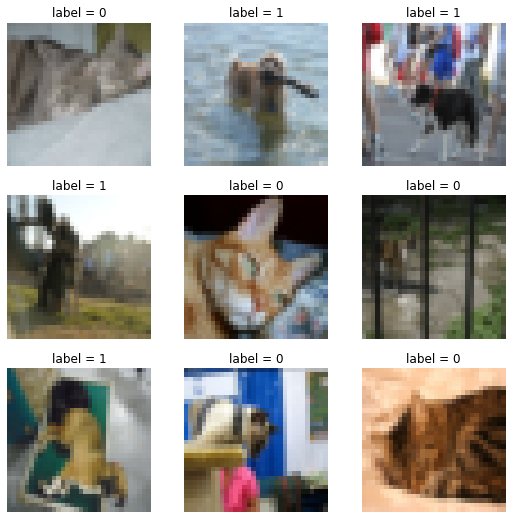

In [7]:
figure(figsize=(9,9))
for i, (data, label) in enumerate(zip(train_data[:9],train_label[:9])):
    subplot(3,3,i+1)
    imshow(to_image(data))
    title('label = %d' %label)
    axis('off')


In [15]:
class Network1(torch.nn.Module):
    def __init__(self, n_hidden=100):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, n_hidden)
        self.linear2 = torch.nn.Linear(n_hidden, 1)
        self.activation = torch.nn.ReLU()
    def forward(self, x):
        return self.linear2(self.activation(self.linear1(x.view(x.size(0),-1))))
    

In [19]:
net1 = Network1(100)
#view(-1) flatten, detach from tensor and convert to numpy
print(net1(train_data).view(-1).detach().numpy())

[-0.17982389 -0.21033119 -0.15571658 -0.20611963 -0.2191094  -0.12202816
 -0.14877062 -0.17891766 -0.16389525 -0.19222392 -0.26454157 -0.14642929
 -0.12595098 -0.17339604 -0.13620014 -0.17081012 -0.2747835  -0.16495813
 -0.19015895 -0.18957962 -0.1368041  -0.08937313 -0.22965847 -0.1362637
 -0.19652833 -0.15770271 -0.16172372 -0.12479277 -0.15003408 -0.20115033
 -0.02871287 -0.09618241 -0.11500755 -0.20880686 -0.19620001 -0.1396735
 -0.20351036 -0.30910352 -0.18300124 -0.2234172  -0.16174221 -0.14993617
 -0.1258664  -0.17160948 -0.13202833 -0.15158416 -0.16800906 -0.18675129
 -0.15967372 -0.24339794 -0.16152029 -0.17984031 -0.20401624 -0.16506156
 -0.15694425 -0.23559342 -0.22064689 -0.19658817 -0.0750359  -0.2500342
 -0.13724573 -0.14204201 -0.25054002 -0.12457471 -0.0882585  -0.18588921
 -0.11330272 -0.19826011 -0.23786123 -0.11489208 -0.18586521 -0.16593944
 -0.21056958 -0.23831229 -0.22574006 -0.19234854 -0.21294595 -0.07265405
 -0.21101838 -0.18065323 -0.11191916 -0.20448583 -0.14

In [22]:
#create a network takes input of arbitrary number of hidden layers
class Network2(torch.nn.Module):
    def __init__(self, *n_hidden):
        super().__init__()
        layer=[]
        in_size = input_size
        for h in n_hidden:
            layer.append(torch.nn.Linear(in_size, h))
            in_size = h
            layer.append(torch.nn.ReLU())
        #sequential to build network
        self.network = torch.nn.Sequential(*layer)
        #classification layer to produce one single output
        #in_size is already updated while iterating through n_hidden
        self.classifier = torch.nn.Linear(in_size, 1)
    def forward(self,x):
        return self.classifier(self.network(x.view(x.size(0),-1)))

In [28]:
net2 = Network2(100,50,20)
print(net2(train_data).view(-1).detach().numpy().shape)

(100,)


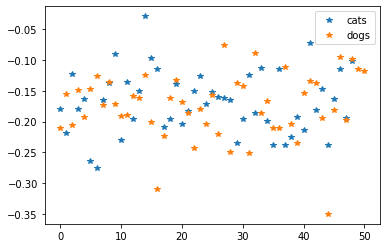

In [27]:
plot(net1(train_data[train_label==0]).view(-1).detach().numpy(),'*',label='cats')
plot(net1(train_data[train_label==1]).view(-1).detach().numpy(),'*',label='dogs')
legend()

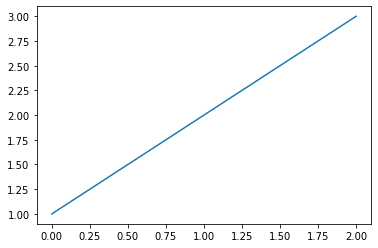

In [29]:
plot([1,2,3])